# Exploratory Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from collections import Counter

In [4]:
import seaborn as sns

In [5]:
import os 
import sys

In [6]:
from tqdm import tqdm

In [7]:
import json

In [8]:
import tqdm.notebook as tq

In [9]:
from pandas import Panel

/home/tanmay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  """Entry point for launching an IPython kernel.


In [10]:
tqdm.pandas()

/home/tanmay/anaconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [11]:
from pandarallel import pandarallel

In [12]:
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [13]:
df = pd.read_csv('processed/title_rating_prof_reg_one.csv')

In [14]:
df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,genres,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0000502,movie,Bohemios,Bohemios,0,1970-01-01 00:00:00.000001905,100.0,4.5,14,"Comedy,Musical",...,0,0,0,0,0,0,0,0,0,0
1,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1970-01-01 00:00:00.000001906,70.0,6.0,754,"Action,Adventure,Biography",...,0,0,0,0,0,0,0,0,0,0
2,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1970-01-01 00:00:00.000001907,90.0,4.6,17,Drama,...,0,0,0,0,0,0,0,0,0,0
3,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1970-01-01 00:00:00.000001907,96.0,4.5,23,Drama,...,0,0,0,0,0,0,0,0,0,0
4,tt0000630,movie,Hamlet,Amleto,0,1970-01-01 00:00:00.000001908,130.0,3.8,24,Drama,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323829,tt9916362,movie,Coven,Akelarre,0,2020-01-01,92.0,6.4,4447,"Drama,History",...,0,0,0,0,0,0,0,0,0,0
323830,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019-01-01,93.0,3.8,14,"Adventure,History,War",...,0,0,0,0,0,0,0,0,1,0
323831,tt9916460,tvMovie,Pink Taxi,Pink Taxi,0,2019-01-01,10.0,9.3,17,Comedy,...,0,0,0,0,0,0,0,0,0,0
323832,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019-01-01,123.0,8.3,6,Drama,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'averageRating', 'numVotes', 'genres',
       'cast_mean', 'cast_std', 'cast_max', 'crew_mean', 'crew_std',
       'crew_max', 'cast_exp', 'crew_exp', 'numRegions', 'Action', 'Adult',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [16]:
df['startYear'] = df['startYear'].apply(lambda x: pd.to_datetime(x).year)

### Num votes vs rating

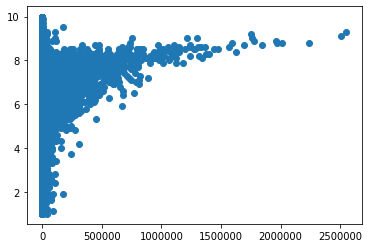

In [17]:
plt.scatter(df['numVotes'], df['averageRating'])

### Age vs rating

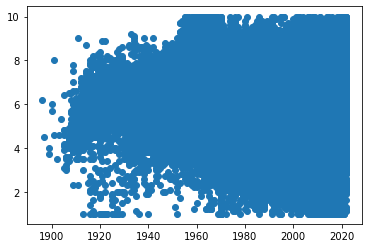

In [18]:
plt.scatter(df['startYear'], df['averageRating'])

### Num regions vs rating

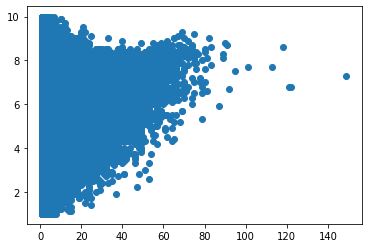

In [19]:
plt.scatter(df['numRegions'], df['averageRating'])

### Runtime vs rating

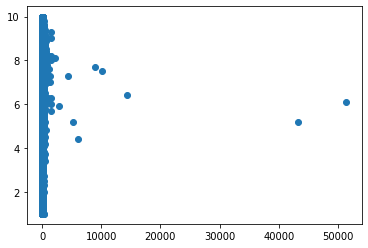

In [20]:
plt.scatter(df['runtimeMinutes'], df['averageRating'])

### cast experience vs rating

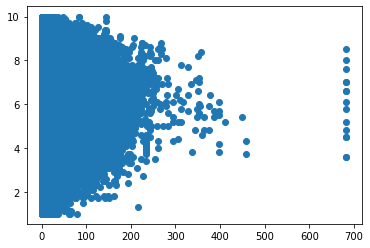

In [21]:
plt.scatter(df['cast_exp'], df['averageRating'])

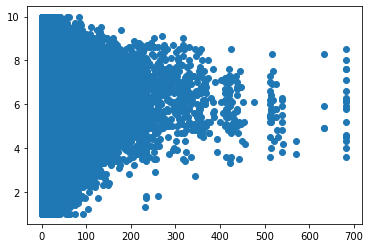

In [22]:
plt.scatter(df['crew_exp'], df['averageRating'])

### Adult vs rating

{'whiskers': [<matplotlib.lines.Line2D at 0x7f35a21eb8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f35a1df3990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f35a1df3b90>,
 'medians': [<matplotlib.lines.Line2D at 0x7f35a21f76d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f35a21eb850>,
 'means': []}

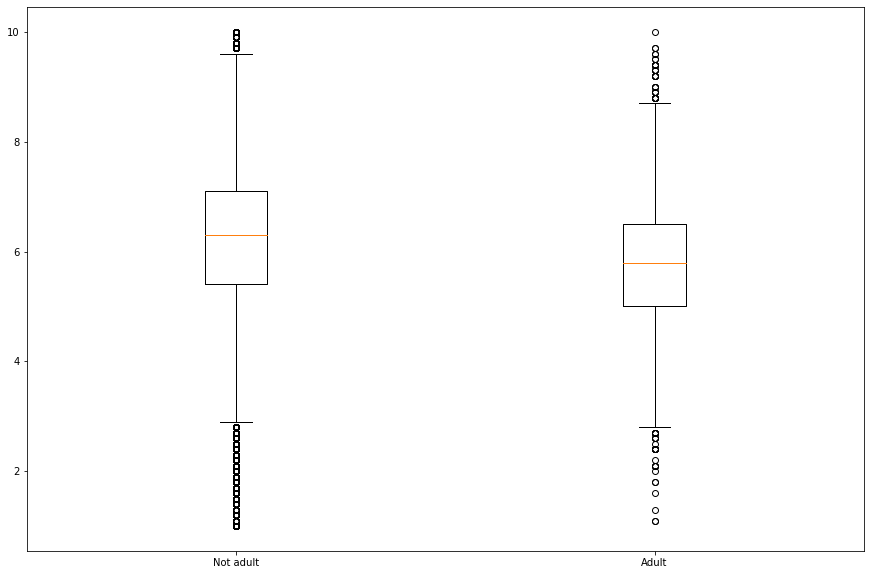

In [40]:
data = [df[df['isAdult'] == 0]['averageRating'].values, df[df['isAdult'] == 1]['averageRating'].values]
# plt.figsize((10,20))
plt.figure(figsize=(15,10))
plt.boxplot(data, labels = ['Not adult', 'Adult'])


### Cast and Crew vs rating

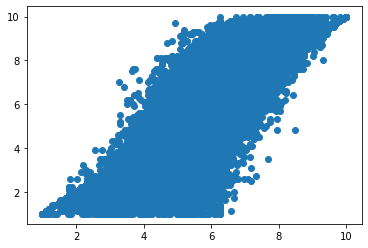

In [57]:
plt.scatter(df['crew_mean'], df['averageRating'])

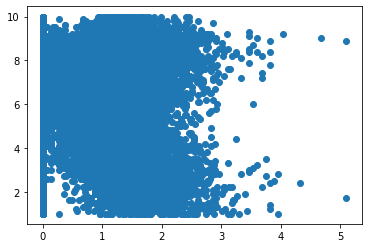

In [59]:
plt.scatter(df['crew_std'], df['averageRating'])

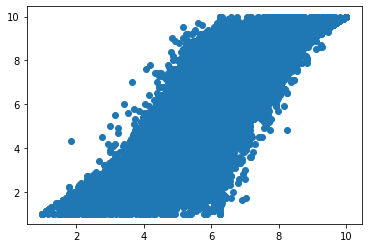

In [58]:
plt.scatter(df['cast_mean'], df['averageRating'])

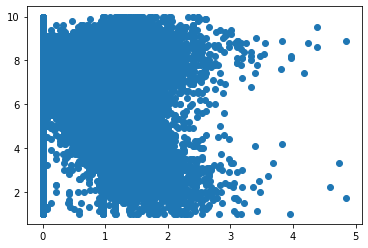

In [60]:
plt.scatter(df['cast_std'], df['averageRating'])

### genre vs ratings

In [24]:
genres = ['Action', 'Adult',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War',
       'Western']

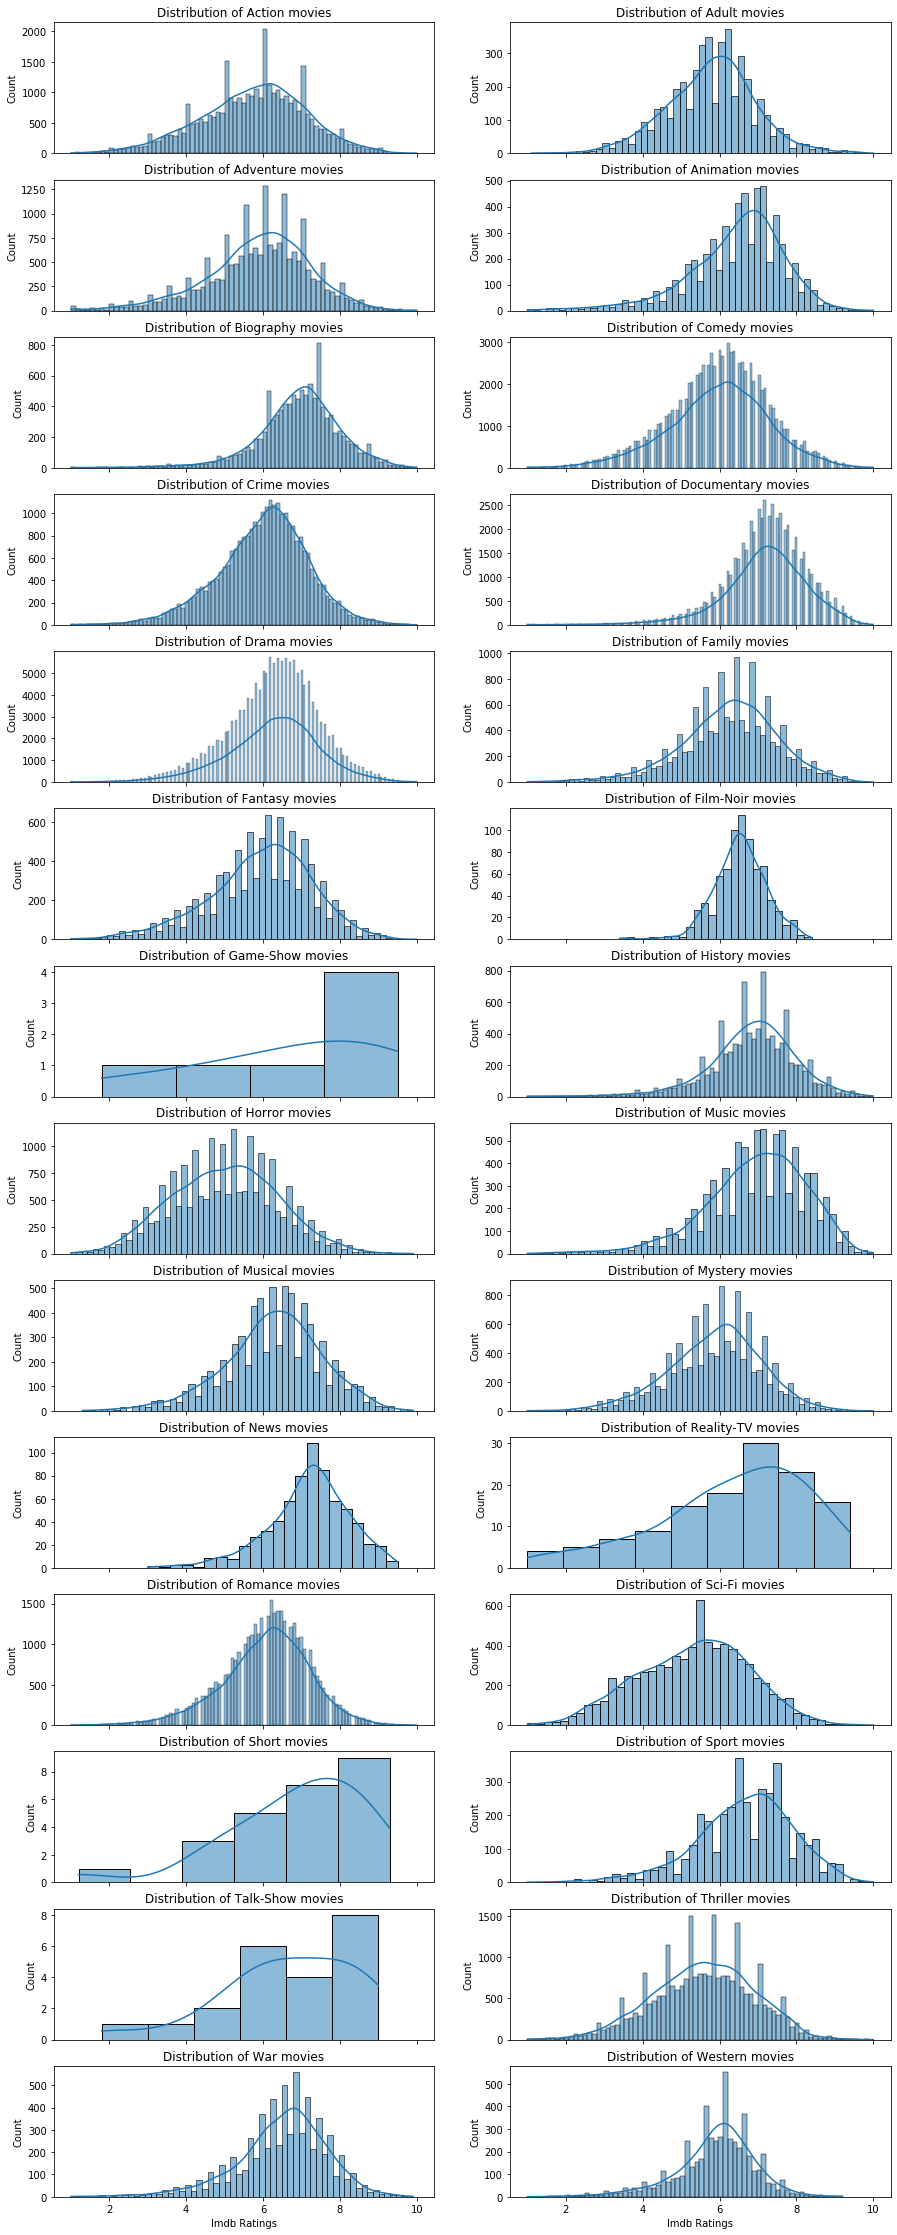

In [56]:
fig, axes = plt.subplots(nrows=len(genres)//2, ncols=2, sharex=True, figsize = (15,40))
for idx, g in enumerate(genres):
    data = df[df[g] == 1]['averageRating'].values
    ax_x, ax_y = idx//2, idx%2
    sns.histplot(data=data, kde=True, ax=axes[idx//2, idx%2])
    axes[ax_x, ax_y].set_xlabel("Imdb Ratings")
    axes[ax_x, ax_y].set_title(f'Distribution of {g} movies')

## Creating the final Training Dataset

In [62]:
df.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'averageRating', 'numVotes', 'genres',
       'cast_mean', 'cast_std', 'cast_max', 'crew_mean', 'crew_std',
       'crew_max', 'cast_exp', 'crew_exp', 'numRegions', 'Action', 'Adult',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [63]:
training_df = df[['isAdult','startYear', 'runtimeMinutes', 
                  'averageRating', 'numVotes', 'cast_mean', 'cast_std', 'cast_max', 'crew_mean', 'crew_std',
                   'crew_max', 'cast_exp', 'crew_exp', 'numRegions', 'Action', 'Adult',
                   'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
                   'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
                   'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
                   'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War',
                   'Western']]

In [67]:
training_df.to_csv('processed/training_df.csv')